# Notebook 6 A - Multi-Class Classification

## 6.A.1 Non-linear Classification Task

In a classification problem, the model learns from labeled data to assign labels to new, unseen instances (generalization) based on their features. We will will use neural network based models that output probabilities for possible classes, helping make informed decisions based on the predicted categories. We will further work with the MNIST dataset (Modified National Institute of Standards and Technology) which is a classic dataset widely used for training and testing machine learning models in image classification tasks. It consists of 70,000 grayscale images of handwritten digits from 0 to 9, split into 60,000 training images and 10,000 test images.

Each image in the dataset is 28x28 pixels, unrolled into a 784-dimensional vector for modeling (our input space). This dataset serves as a benchmark for machine learning algorithms, as it presents a relatively simple, yet meaningful task: identifying handwritten digits. Despite its simplicity, the MNIST dataset is a great starting point for building and evaluating classification models.

In [3]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import numpy as np

# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
# The astype forces a conversion to a class as an int (not a string)
X, y = mnist["data"], mnist["target"].astype(int)


### One-hot encoding 

In multi-class classification, often one-hot encoding is used. This is a technique used to represent categorical data as binary vectors. In the context of classification, it converts each class label into a binary vector, where only the index corresponding to the class is set to 1, and all other indices are set to 0. This format is useful in machine learning because it provides a standardized way to handle categorical labels in numerical computations.

For example, in the MNIST dataset with digits 0 to 9, the label "3" would be represented as:

`[0,0,0,1,0,0,0,0,0,0]`

This encoding is beneficial in training neural networks, as it enables the model to distinguish among all classes during optimization.

Task:

* Transform y into one-hot encoding
* split this into a training and a test set.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

def load_all_classes(X, y, num_train=60000, num_test=10000):
    """
    Load MNIST data for all digits (0-9) and split into train and test sets with one-hot encoding.
    
    Parameters:
    - X: np.array, feature data for all samples (e.g., from MNIST)
    - y: np.array, target labels for all samples (e.g., from MNIST)
    - num_train: int, number of samples to return in the training set (default: 60000)
    - num_test: int, number of samples to return in the test set (default: 10000)
    
    Returns:
    - X_train, y_train: training data and one-hot encoded labels
    - X_test, y_test: test data and one-hot encoded labels
    """
    # TODO: 
    # One-hot encode the labels in y (from range 0 to 9) into a numpy array with the shape [samples,10] as 
    # a one-hot encoded vector.
    # Later: you can simplify this using the OneHotEncoder from sklearn.
    y_one_hot = np.zeros((len(y), 10))
    for i in range(len(y)):
        y_one_hot[i][y[i]] = 1
        
    #alternative:
    # y_one_hot = np.eye(10)[y]

    # TODO: Shuffle and split into training and test sets - using train_test_split from sklearn
    X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=num_test, train_size=num_train)

    return X_train, y_train, X_test, y_test

# Use the function to load and split the MNIST dataset
X_train, y_train, X_test, y_test = load_all_classes(X, y, num_train=1000, num_test=1000)

# Display shapes of the resulting datasets
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Training set shape: (1000, 784) (1000, 10)
Test set shape: (1000, 784) (1000, 10)


### Explanation

* For One-Hot Encoding: `OneHotEncoder` from `sklearn.preprocessing` is used to convert the labels into a one-hot encoded format, where each label is represented by a binary vector of length 10.
* Data Splitting: `train_test_split` is used to split the dataset into training and test sets, with stratification on y to ensure balanced representation of each class in both sets.
* Return Values: The function returns `X_train, y_train, X_test`, and `y_test`, with `y_train` and `y_test` in a one-hot encoded format.

**Task:**

Adapt the old routine for visualization, now using the one-hot encoded targets (`y_train`).

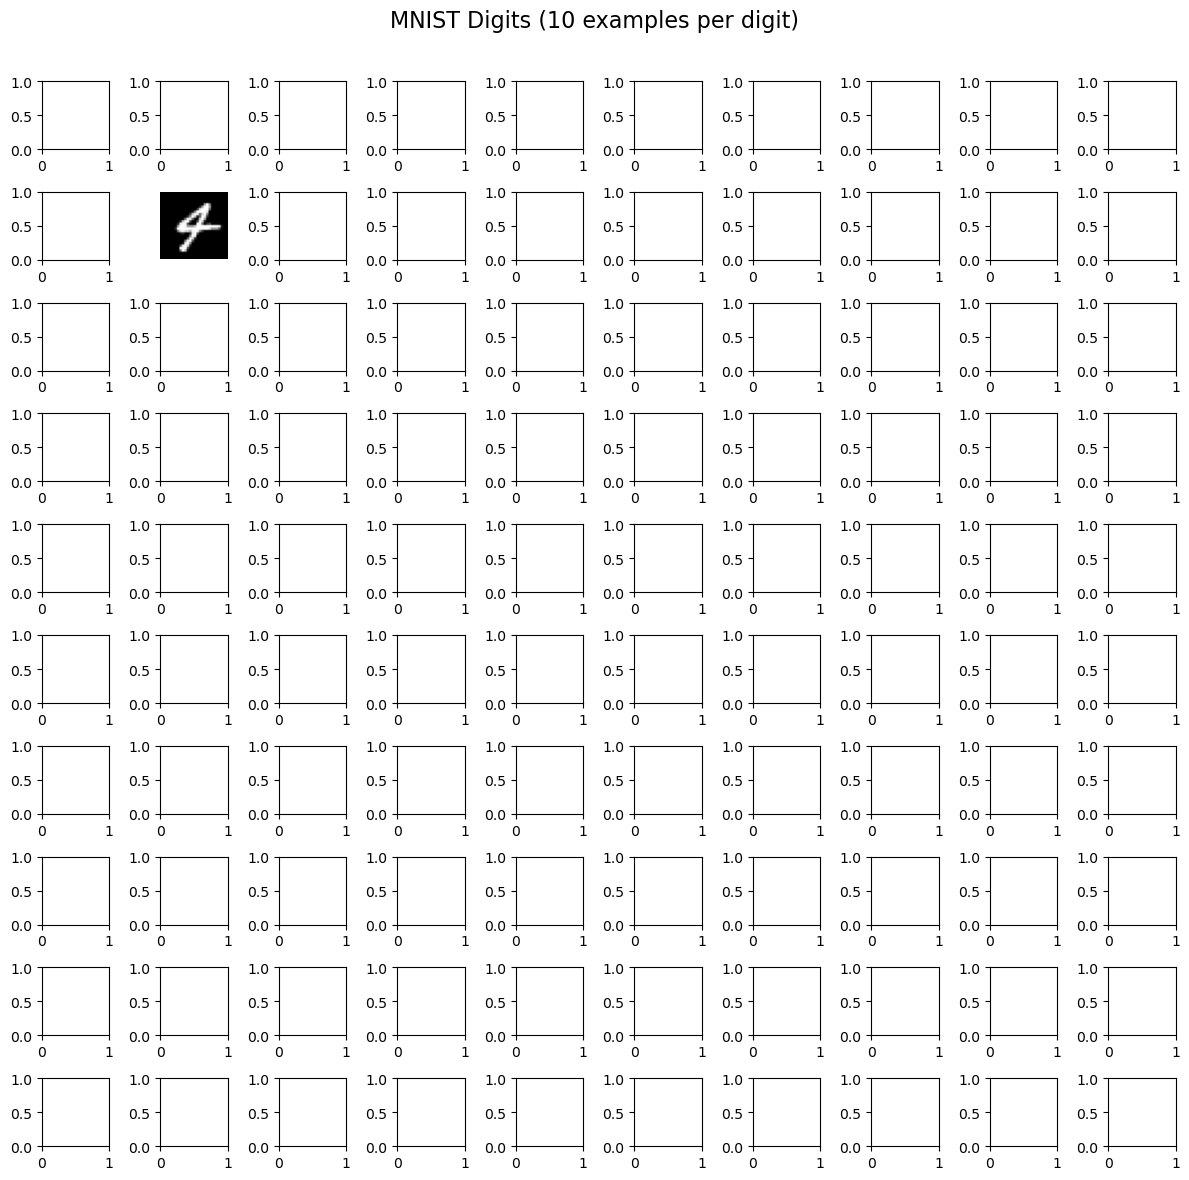

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml


# Set up a 10x10 grid of subplots
fig, axes = plt.subplots(10, 10, figsize=(12, 12))
fig.suptitle("MNIST Digits (10 examples per digit)", fontsize=16)

# TODO 
# - Search for each digit a couple of examples
# - Plot these as images

image = X_train[0].reshape(28, 28)
        
# Plot the image in the corresponding subplot
ax = axes[1, 1]
ax.imshow(image, cmap="gray")
ax.axis("off")

plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()


---

## 6.A.2 Multi-Layer Perceptron Model

In this task, we implement and evaluate a Multi-Layer Perceptron (MLP) model using TensorFlow. We will use a simple MLP architecture with one hidden layer and test how varying the hidden layer size affects model performance on the MNIST dataset. The MNIST dataset consists of grayscale images of handwritten digits (0-9), and our goal is to classify each image correctly.

Using TensorFlow for this task allows us to define, train, and evaluate MLP models efficiently, providing insights into how model capacity (controlled by hidden layer size) impacts accuracy and generalization.

**Explanation:**
- **1. Model Definition and Compilation**:
    - Define an MLP model in TensorFlow with:
      - A single hidden layer of specified size.
      - `relu` activation for the hidden layer.
      - `softmax` activation for the output layer (for 10-class classification).
    - Compile the model with the Adam optimizer and categorical cross-entropy loss.

- **2. Data Preparation**:
    - Use the MNIST dataset, with one-hot encoded labels, to train and evaluate the model.
  
- **3. Train the Model**:
    - Train the model on the MNIST training data for a set number of epochs (e.g., 10).
    - Monitor both training and validation loss and accuracy throughout training.

- **4. Evaluate Model Performance**:
    - After training, calculate and display a confusion matrix for the test set to understand the classification performance across different classes.
    - Visualize the loss and accuracy trends during training to assess convergence and potential overfitting.

By analyzing the model's performance across different configurations, this task demonstrates the impact of hidden layer size and provides a foundational understanding of how MLPs learn to classify images in TensorFlow.


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Define the model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)),  # Input layer
    tf.keras.layers.Dense(32, activation='relu'),                 # Hidden layer with 64 units
    tf.keras.layers.Dense(10, activation='softmax')               # Output layer with 10 units for 10 classes
])

# Compile the model with optimizer, loss function, and metrics
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Train the model and store training history
history = model.fit(X_train, y_train, 
                    epochs=20,  # You can adjust the number of epochs as needed
                    batch_size=32, 
                    validation_data=(X_test, y_test), 
                    verbose=1)

# Plot the loss and accuracy over epochs
plt.figure(figsize=(12, 5))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss During Training")
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label="Training Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy", color="orange")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy During Training")
plt.legend()

plt.tight_layout()
plt.show()


**Task:**

* Create a confusion matrix for the multi-class classifier (see Task 4.A.$).

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Convert one-hot encoded y_test to class labels
y_test_labels = np.argmax(y_test, axis=1)  # True labels
y_pred = ...
# TODO
y_pred_labels = ...

# Compute the confusion matrix for the test set
cm_test = confusion_matrix(y_test_labels, y_pred_labels)

# Display the confusion matrix for the test set
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=np.arange(10))
disp_test.plot(cmap="Blues")
plt.title("Confusion Matrix (Test Set)")
plt.show()


### Experiment: Evaluating the Impact of Hidden Layer Size on MLP Performance

In this experiment, we aim to understand how the size of the hidden layer affects the performance of a simple Multi-Layer Perceptron (MLP) on the MNIST digit classification task. We will train MLP models with varying numbers of neurons in the hidden layer and measure both training and testing accuracy after 10 epochs for each configuration.

By comparing different hidden layer sizes, we hope to gain insight into the model's ability to capture patterns in the data with limited complexity and evaluate its generalization performance.

**Tasks:**
- **1. Define Hidden Layer Sizes**: Specify a list of hidden layer sizes to test: `[1, 2, 4, 8, 16, 32, 64, 128]`.
  
- **2. Model Setup and Compilation**:
    - For each hidden layer size, define an MLP model with:
      - One hidden layer of the specified size.
      - `relu` activation for the hidden layer.
      - `softmax` activation for the output layer (for 10-class classification).
    - Compile the model with the Adam optimizer and categorical cross-entropy loss.
  
- **3. Train the Model**: Train each model for 10 epochs on the MNIST training set, using a batch size of 32.

- **4. Evaluate Accuracy**:
    - Calculate both the training and test accuracy for each model configuration.
    - Store the accuracies to compare how hidden layer size impacts model performance.
  
- **5. Visualize Results**:
    - Plot the training and test accuracy for each hidden layer size to visualize the relationship between hidden layer size and model performance.

This approach will allow us to analyze the trade-offs in model complexity and generalization across various hidden layer sizes.


In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Define hidden layer sizes to test, starting with 1 and 2
hidden_layer_sizes = [1, 2, 4, 8, 16, 32, 64, 128]
train_accuracies = []
test_accuracies = []

# TODO: Based on the code from above, 
# - vary the hidden layer size 
# - for each one build a model, train it (try only a couple epochs)
# - append the accuracies to the different lists 
# Loop over different hidden layer sizes



# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(hidden_layer_sizes, train_accuracies, marker='o', label="Train Accuracy")
plt.plot(hidden_layer_sizes, test_accuracies, marker='o', label="Test Accuracy")
plt.xlabel("Hidden Layer Size")
plt.ylabel("Accuracy")
plt.title("Train and Test Accuracy for Different Hidden Layer Sizes (10 Epochs)")
plt.xticks(hidden_layer_sizes)
plt.legend()
plt.grid()
plt.show()


ModuleNotFoundError: No module named 'tensorflow'

### Analyzing Model Complexity by Hidden Layer Size

In this task, we aim to understand how the number of parameters in a Multi-Layer Perceptron (MLP) model changes with different hidden layer sizes. By testing a variety of hidden layer sizes on an MLP for the MNIST dataset, we can evaluate the trade-offs in model complexity, computation requirements, and potential learning capacity.

**Explanation of Parameter Calculation**

Each MLP model in this experiment has:
1. **Input Layer to Hidden Layer**: The number of parameters (weights and biases) connecting the input layer to the hidden layer can be calculated as:
   $$
   \text{Parameters} = (\text{Input Dimension} + 1) \times \text{Hidden Layer Size}
   $$
   where `+1` accounts for the bias term.

2. **Hidden Layer to Output Layer**: The number of parameters connecting the hidden layer to the output layer (with 10 output neurons for MNIST’s 10 classes) is calculated as:
   $$
   \text{Parameters} = (\text{Hidden Layer Size} + 1) \times \text{Output Dimension}
   $$
   where `+1` accounts for the bias term in the output layer.

3. **Total Parameters**: The total number of parameters is the sum of the parameters from the input-to-hidden and hidden-to-output connections.

**Tasks:**

1. **Loop through Hidden Layer Sizes**: Define a list of hidden layer sizes to test, such as `[1, 2, 4, 8, 16, 32, 64, 128]`.

2. **Define and Compile Model**:
    - For each hidden layer size, define an MLP model with:
      - One hidden layer of the specified size.
      - `relu` activation for the hidden layer.
      - `softmax` activation for the output layer (for 10-class classification).
    - Use TensorFlow’s `.summary()` method to display the number of parameters in each layer and confirm calculations.

3. **Calculate and Store Parameters**:
    - Use `model.count_params()` to calculate the total number of parameters for each model configuration.

4. **Plot the Results**:
    - Visualize the total number of parameters for each hidden layer size to understand how model complexity scales with layer size.

This approach provides a clear visualization of how hidden layer size influences model complexity, helping us analyze the trade-offs between model capacity and computational cost.


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Define the input and output dimensions for MNIST
input_dim = 784  # 28x28 images flattened
output_dim = 10  # 10 classes for digits 0-9

# Define hidden layer sizes to test
hidden_layer_sizes = [1, 2, 4, 8, 16, 32, 64, 128]
total_params_list = []

# Loop through each hidden layer size, create a model, and calculate parameters
for hidden_size in hidden_layer_sizes:
    # TODO
    # Calculate for each layer size how many neurons are required 

    # As an alternative: Simply rebuild the model and inspect these
    # Compare the values
    # Define the model with one hidden layer of `hidden_size`
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(input_dim,)),
        tf.keras.layers.Dense(hidden_size, activation='relu'),
        tf.keras.layers.Dense(output_dim, activation='softmax')
    ])
    
    # Display the model summary to see the parameters for each layer
    print(f"\nModel with hidden layer size {hidden_size}:")
    model.summary()
    
    # Calculate total parameters using the model's .count_params() method
    total_params = model.count_params()
    total_params_list.append(total_params)

# Plot the total number of parameters for each hidden layer size
plt.figure(figsize=(10, 5))
plt.plot(hidden_layer_sizes, total_params_list, marker='o')
plt.xlabel("Hidden Layer Size")
plt.ylabel("Total Parameters")
plt.title("Total Parameters for Different Hidden Layer Sizes")
plt.xticks(hidden_layer_sizes)
plt.grid()
plt.show()


---

## 6.A.3 Regularization

In this task, we explore regularization techniques (for example: L2 regularization or dropout) to prevent overfitting in a neural network with 128 hidden neurons. Regularization helps improve generalization by reducing the model's sensitivity to the training data, encouraging it to learn patterns that generalize better to new data.

**Tasks:**

1. Implement an MLP Model with Regularization:
    - Define an MLP with 128 hidden neurons, applying L2 or dropout regularization on the weights.  
2. Train the Model:
    - Train the model for a set number of epochs (e.g., 20) and monitor training and validation loss.
3. Visualize Learning Curves:
    - Plot the training and validation loss for the model to compare the effects of regularization on the model's learning dynamics.


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Define model architecture parameters
input_dim = 784  # 28x28 images flattened to 784 features
hidden_neurons = 128  # Hidden layer with 128 neurons
output_dim = 10  # Output layer for 10 classes
epochs = 10  # Number of epochs

# Model 1: MLP without any regularization (baseline)
model_no_reg = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(input_dim,)),
    tf.keras.layers.Dense(hidden_neurons, activation='relu'),
    tf.keras.layers.Dense(output_dim, activation='softmax')
])

# Compile the baseline model without regularization
model_no_reg.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

# Train the baseline model without regularization
history_no_reg = model_no_reg.fit(X_train, y_train,
                                  epochs=epochs,
                                  batch_size=32,
                                  validation_data=(X_test, y_test),
                                  verbose=1)

# TODO: Build a model with L2 regularization
# You have to add a kernel_regularizer as an option in the dense layer
# (see above for the full model)
# Model 2: MLP with L2 regularization
model_l2 = ...

# Compile the L2-regularized model
model_l2.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

# Train the L2-regularized model
history_l2 = model_l2.fit(X_train, y_train,
                          epochs=epochs,
                          batch_size=32,
                          validation_data=(X_test, y_test),
                          verbose=1)

# TODO: Include a Dropout layer in-between the last two dense layers with a dropout of 0.5
# Model 3: MLP with Dropout regularization
model_dropout = ...

# Compile the Dropout-regularized model
model_dropout.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

# Train the Dropout-regularized model
history_dropout = model_dropout.fit(X_train, y_train,
                                    epochs=epochs,
                                    batch_size=32,
                                    validation_data=(X_test, y_test),
                                    verbose=1)

# Plot the learning curves for all three models (accuracy)
plt.figure(figsize=(12, 6))

# Plot training and validation accuracy for L2 regularization
plt.plot(history_l2.history['accuracy'], label='Train Accuracy (L2)', linestyle='--', color='blue')
plt.plot(history_l2.history['val_accuracy'], label='Val Accuracy (L2)', color='blue')

# Plot training and validation accuracy for Dropout regularization
plt.plot(history_dropout.history['accuracy'], label='Train Accuracy (Dropout)', linestyle='--', color='orange')
plt.plot(history_dropout.history['val_accuracy'], label='Val Accuracy (Dropout)', color='orange')

# Plot training and validation accuracy for the model without regularization
plt.plot(history_no_reg.history['accuracy'], label='Train Accuracy (No Reg)', linestyle='--', color='green')
plt.plot(history_no_reg.history['val_accuracy'], label='Val Accuracy (No Reg)', color='green')

# Add plot details
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy for Different Regularization Techniques")
plt.legend()
plt.grid()
plt.show()


---
## 6.A.4 Convolutional Neural Network

We now explore a minimal Convolutional Neural Network (CNN) architecture designed to classify handwritten digits in the MNIST dataset. Initially, the network consists of a single convolutional layer, a pooling layer, and a fully connected (dense) layer. Despite its simplicity, this CNN can achieve competitive accuracy (around 89% on the test set), similar to the best performance observable with a Multi-Layer Perceptron (MLP).

### Architecture:
1. **Convolutional Layer**:
   - Applies 32 filters of size 3x3 with ReLU activation to the input images, detecting local patterns such as edges and shapes.

2. **Max-Pooling Layer**:
   - A 2x2 max-pooling layer downsamples the feature maps, retaining key information while reducing spatial dimensions. This process helps prevent overfitting and reduces computation.

3. **Flatten Layer**:
   - Transforms the 2D feature maps into a 1D vector, enabling connection to the fully connected layer.

4. **Fully Connected (Dense) Layer**:
   - A dense layer with 128 neurons and ReLU activation provides the model's learning capacity. 
   - The output layer uses softmax activation with 10 neurons (one for each digit class), making the model suitable for multi-class classification.

**Training and Evaluation**:

- **Training**: The model is trained for 10 epochs with a batch size of 32. Both training and validation accuracy are monitored to observe learning progression.
- **Evaluation**: The model achieves around 89% accuracy on the test set, demonstrating that even a minimal CNN can capture the essential features for MNIST classification.

This minimal CNN provides a powerful yet efficient baseline for image classification and can be extended with additional layers or regularization for improved performance.


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Reshape the data to include a single channel for grayscale images (28x28x1)
X_train_cnn = X_train.reshape(-1, 28, 28, 1)
X_test_cnn = X_test.reshape(-1, 28, 28, 1)

# Define the minimal CNN architecture
model_cnn = tf.keras.models.Sequential([
    # Convolutional layer with 32 filters, kernel size 3x3, and ReLU activation
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    
    # Max pooling layer with pool size 2x2
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    # Flatten layer to reshape 2D feature maps to 1D feature vector
    tf.keras.layers.Flatten(),
    
    # Fully connected (dense) layer with 128 units and ReLU activation
    tf.keras.layers.Dense(128, activation='relu'),
    
    # Output layer with 10 units (one for each class) and softmax activation
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the CNN model
model_cnn.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Train the CNN model
history_cnn = model_cnn.fit(X_train_cnn, y_train,
                            epochs=10,
                            batch_size=32,
                            validation_data=(X_test_cnn, y_test),
                            verbose=1)

# Plot the training and validation accuracy for the CNN
plt.figure(figsize=(10, 5))
plt.plot(history_cnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy for the Minimal CNN")
plt.legend()
plt.grid()
plt.show()

# Evaluate the model on the test set
test_loss, test_accuracy = model_cnn.evaluate(X_test_cnn, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")


### Implementing the LeNet-5 Architecture

In this task, we will adapt our minimal Convolutional Neural Network (CNN) to implement the **LeNet-5 architecture**, a classic CNN architecture designed by Yann LeCun for handwritten digit recognition. LeNet-5 is well-suited for the MNIST dataset and includes several convolutional and pooling layers, followed by fully connected layers. 

![](solution/lenet5.svg)

1. **Input Layer**: Accepts 28x28 grayscale images as input, with each image normalized to a range of 0–1.

2. **Convolutional Layer 1**:
   - Applies 6 filters of size 5x5 with stride 1 and ReLU activation, producing 6 feature maps.
   - The resulting feature maps have dimensions of 24x24.

3. **Pooling Layer 1 (Average Pooling)**:
   - Averages over 2x2 regions, reducing each feature map to a size of 12x12.
   - Pooling reduces the spatial dimensions and adds robustness to small spatial translations.

4. **Convolutional Layer 2**:
   - Applies 16 filters of size 5x5 with stride 1 and ReLU activation, producing 16 feature maps.
   - The resulting feature maps have dimensions of 8x8.

5. **Pooling Layer 2 (Average Pooling)**:
   - Another 2x2 average pooling layer, reducing each feature map to a size of 4x4.

6. **Fully Connected Layers**:
   - **Fully Connected Layer 1**: Flattens the output from the convolutional layers and connects to a fully connected layer with 120 neurons and ReLU activation.
   - **Fully Connected Layer 2**: Connects to a fully connected layer with 84 neurons and ReLU activation.
   - **Output Layer**: The final layer is a fully connected layer with 10 neurons and softmax activation, used for classification into the 10 digit classes.

**Tasks:**
- **1. Implement LeNet-5 Architecture**: Define a CNN model in TensorFlow that replicates the LeNet-5 architecture as described above.
- **2. Compile and Train**: Compile the model using categorical cross-entropy loss and the Adam optimizer. Train the model on the MNIST dataset for a set number of epochs.
- **3. Evaluate Performance**: Plot the training and validation accuracy over epochs and calculate the final test accuracy. Compare this performance with the minimal CNN and MLP results from previous tasks.

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Reshape the data to include a single channel for grayscale images (28x28x1)
X_train_cnn = X_train.reshape(-1, 28, 28, 1)
X_test_cnn = X_test.reshape(-1, 28, 28, 1)

# Define the LeNet-5 architecture
model_lenet5 = tf.keras.models.Sequential([
    # TODO: Add the LeNet-5 model layers
    # Output Layer: 10 units with softmax activation for classification
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model_lenet5.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

# Train the model
history_lenet5 = model_lenet5.fit(X_train_cnn, y_train,
                                  epochs=20,
                                  batch_size=32,
                                  validation_data=(X_test_cnn, y_test),
                                  verbose=1)

# Plot the learning curves
plt.figure(figsize=(10, 5))
plt.plot(history_lenet5.history['accuracy'], label='Train Accuracy')
plt.plot(history_lenet5.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy for LeNet-5 Architecture")
plt.legend()
plt.grid()
plt.show()

# Evaluate the model on the test set
test_loss, test_accuracy = model_lenet5.evaluate(X_test_cnn, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")


<div style="text-align: right;">
<i>This notebook has been created with the help of ChatGPT-4, 14.11.2024; Explanations were initially generated and afterwards edited;</i>
</div>